<a href="https://colab.research.google.com/github/palakharinkhede4/Breast-Cancer-Malignancy-Detection/blob/main/ANN_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install ultralytics
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


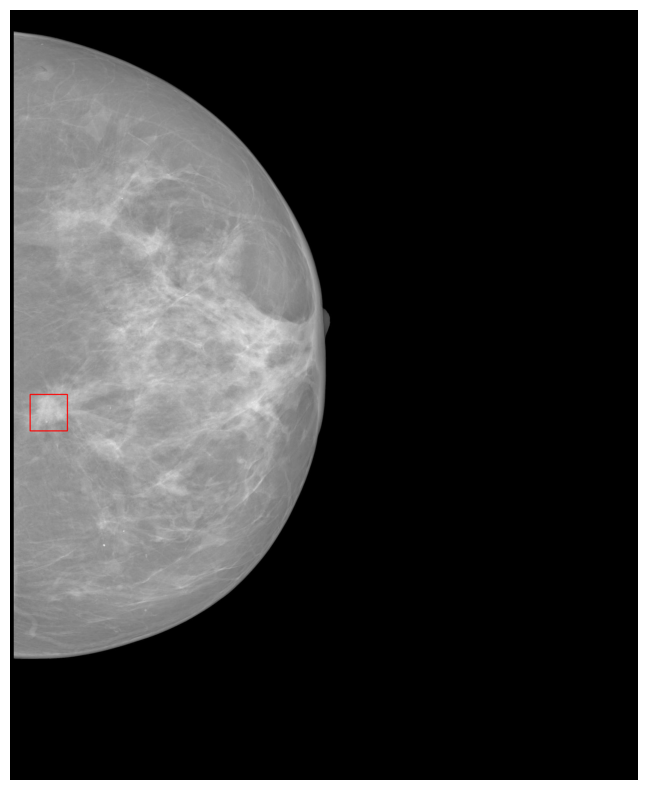

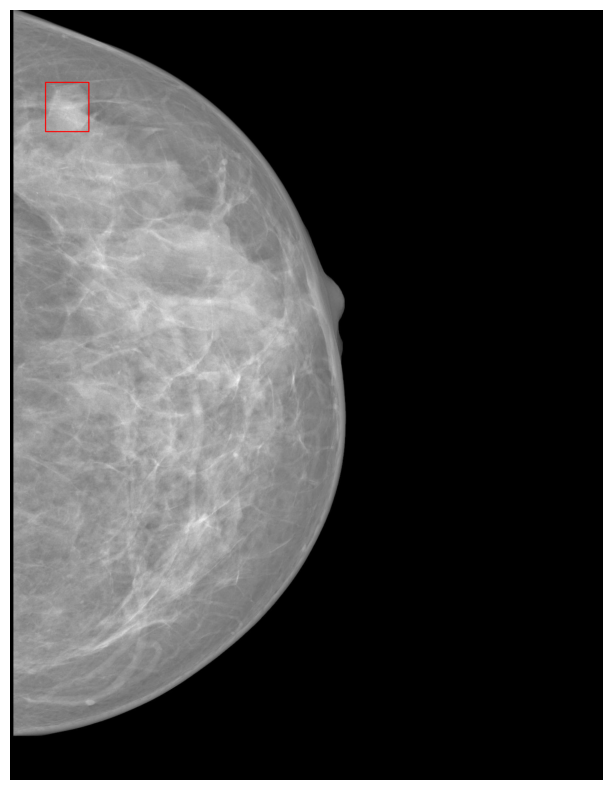

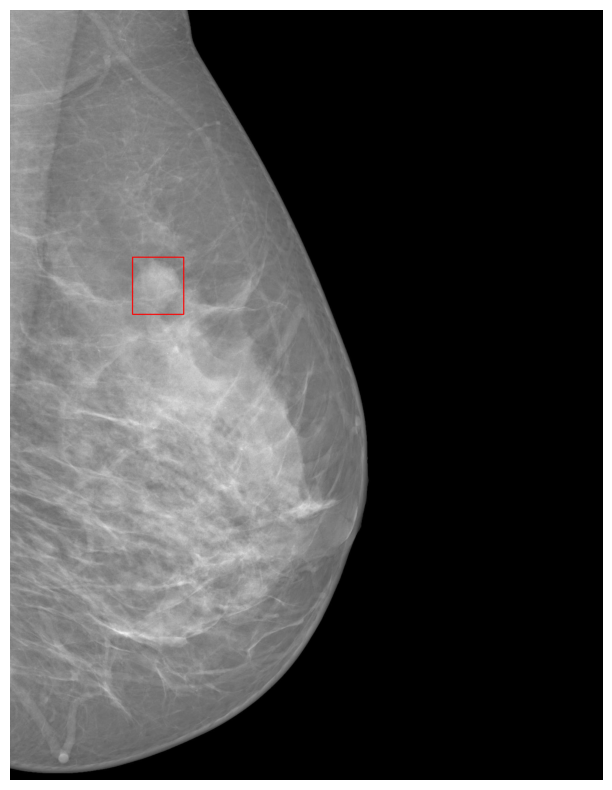

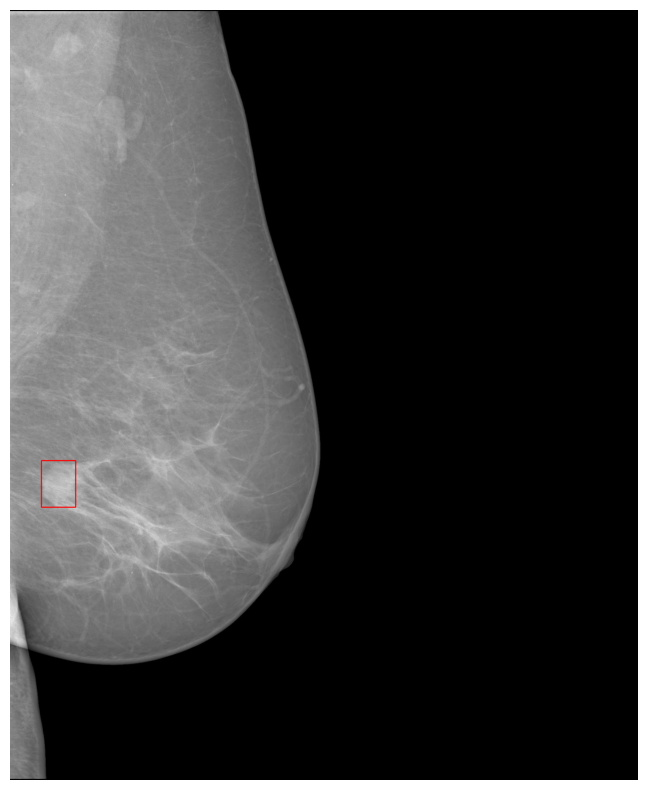

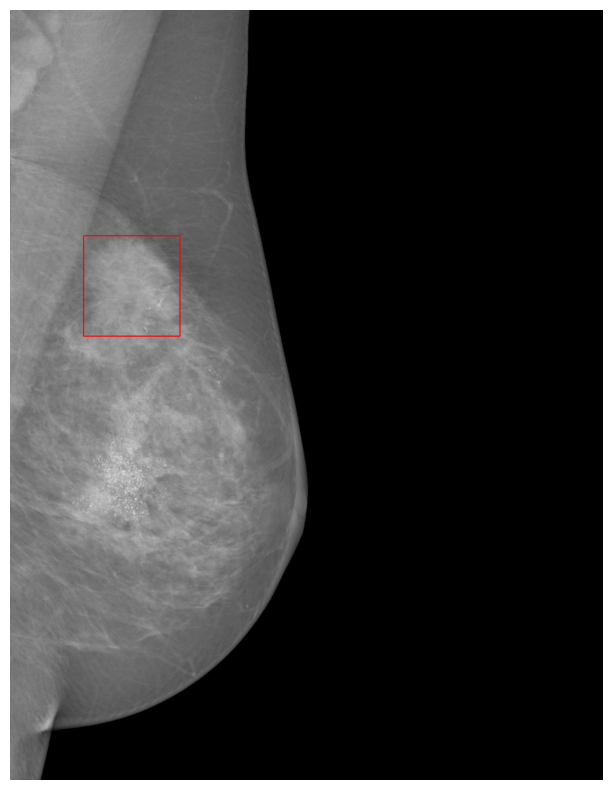

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

def display_samples(image_folder, annotation_folder, num_samples=5):
    """
    Function to display random samples from the dataset along with annotations
    :param image_folder: Path to the folder containing images
    :param annotation_folder: Path to the folder containing annotation files (typically in txt format)
    :param num_samples: Number of samples to display
    """
    # Get all image files in the folder
    image_files = list(Path(image_folder).glob('*.jpg'))  # Change extension if needed (e.g., '.png', '.jpeg')

    # Select random samples
    sample_images = random.sample(image_files, num_samples)

    # Loop through selected samples and display them
    for image_file in sample_images:
        image = cv2.imread(str(image_file))  # Read the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB for displaying with matplotlib

        # Get the corresponding annotation file
        annotation_file = Path(annotation_folder) / (image_file.stem + '.txt')  # Assuming annotations are in txt format with the same name as the image

        # Read annotations (if they exist)
        if annotation_file.exists():
            with open(annotation_file, 'r') as f:
                annotations = f.readlines()

            # Draw bounding boxes based on annotations
            for annotation in annotations:
                parts = annotation.strip().split()
                # Assuming the format is [class_id, x_center, y_center, width, height]
                x_center, y_center, width, height = map(float, parts[1:])
                image_height, image_width, _ = image.shape

                # Convert normalized values to pixel values
                x_min = int((x_center - width / 2) * image_width)
                y_min = int((y_center - height / 2) * image_height)
                x_max = int((x_center + width / 2) * image_width)
                y_max = int((y_center + height / 2) * image_height)

                # Draw the rectangle (bounding box)
                cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # BGR color for rectangle

        # Display the image with annotations
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')  # Hide axes for better visualization
        plt.show()

# Example usage
image_folder = '/content/drive/MyDrive/Inbreast dataset with annotations/valid/images'  # Change path as needed
annotation_folder = '/content/drive/MyDrive/Inbreast dataset with annotations/valid/labels'  # Change path as needed

# Display a few random samples
display_samples(image_folder, annotation_folder, num_samples=5)


In [3]:
from ultralytics import YOLO

# Define the model (YOLOv8 architecture). You can choose a pre-trained model (e.g., 'yolov8n.pt' for a small model)
model = YOLO('yolov8n.pt')  # Load a YOLOv8 pre-trained model

# Train the model using the custom dataset
# Change device to 'cpu' since no GPU is available
model.train(
    data='/content/drive/MyDrive/Inbreast dataset with annotations/data.yaml',  # Path to the .yaml dataset configuration file
    epochs=20,                  # Number of epochs (adjust as necessary)
    batch=16,                   # Batch size (adjust as necessary)
    imgsz=640,                  # Image size (adjust as necessary)
    device='cpu'                 # Use CPU for training
)

# Save the trained model
model.save('best_model.pt')  # Save the best weights


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Inbreast dataset with annotations/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning /content/drive/MyDrive/Inbreast dataset with annotations/train/labels.cache... 234 images, 0 backgrounds, 0 corrupt: 100%|██████████| 234/234 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Inbreast dataset with annotations/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.991      4.338      1.647         13        640: 100%|██████████| 15/15 [03:45<00:00, 15.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         15         15    0.00156      0.467    0.00211   0.000563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.695      3.154      1.365         17        640: 100%|██████████| 15/15 [03:43<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]

                   all         15         15      0.002        0.6    0.00333    0.00147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.715      2.475      1.373         17        640: 100%|██████████| 15/15 [03:35<00:00, 14.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

                   all         15         15    0.00222      0.667    0.00857    0.00326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.626      2.396      1.435         19        640: 100%|██████████| 15/15 [03:39<00:00, 14.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]

                   all         15         15    0.00311      0.933     0.0647     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.662      2.354      1.384         18        640: 100%|██████████| 15/15 [03:37<00:00, 14.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]

                   all         15         15          1      0.329      0.567      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.605      2.016      1.287         19        640: 100%|██████████| 15/15 [03:38<00:00, 14.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.17s/it]

                   all         15         15      0.987      0.333      0.672      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G       1.62      1.981      1.373         14        640: 100%|██████████| 15/15 [03:32<00:00, 14.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.14s/it]

                   all         15         15      0.546      0.333       0.35      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.653      1.913      1.361         16        640: 100%|██████████| 15/15 [03:32<00:00, 14.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]

                   all         15         15       0.82      0.606      0.723      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.664      1.795      1.376         23        640: 100%|██████████| 15/15 [03:35<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]

                   all         15         15        0.6      0.599      0.642      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.553      1.645       1.28         22        640: 100%|██████████| 15/15 [03:33<00:00, 14.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.65s/it]

                   all         15         15      0.794      0.467      0.649      0.382


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.481      1.812      1.336         12        640: 100%|██████████| 15/15 [03:32<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

                   all         15         15       0.69      0.533      0.683      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G        1.5      1.647      1.304         14        640: 100%|██████████| 15/15 [03:33<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

                   all         15         15      0.662      0.784      0.765      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G       1.49      1.587      1.302         11        640: 100%|██████████| 15/15 [03:32<00:00, 14.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         15         15      0.933      0.923      0.928      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.415      1.508      1.259         11        640: 100%|██████████| 15/15 [03:32<00:00, 14.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.19s/it]

                   all         15         15      0.803      0.816      0.897      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G       1.33      1.414      1.209          9        640: 100%|██████████| 15/15 [03:37<00:00, 14.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.24s/it]

                   all         15         15       0.81      0.933       0.87      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.303      1.333      1.217         10        640: 100%|██████████| 15/15 [03:37<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         15         15      0.845      0.867      0.873      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.314      1.243      1.178         12        640: 100%|██████████| 15/15 [03:34<00:00, 14.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.29s/it]

                   all         15         15      0.862      0.831      0.899      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.255       1.22      1.187         12        640: 100%|██████████| 15/15 [03:32<00:00, 14.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]

                   all         15         15      0.908        0.8      0.838      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.214      1.145      1.165         13        640: 100%|██████████| 15/15 [03:35<00:00, 14.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]

                   all         15         15      0.977        0.8      0.912      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.253       1.13      1.163         14        640: 100%|██████████| 15/15 [03:39<00:00, 14.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]

                   all         15         15      0.988        0.8      0.915      0.536



20 epochs completed in 1.231 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]


                   all         15         15       0.81      0.933       0.87      0.555
Speed: 2.1ms preprocess, 278.1ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train3


In [4]:

# Evaluate the model on the validation/test set
results = model.val(data='/content/drive/MyDrive/Inbreast dataset with annotations/data.yaml')
print("Evaluation results:")
print(results)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Inbreast dataset with annotations/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]


                   all         15         15       0.81      0.933       0.87      0.555
Speed: 2.0ms preprocess, 244.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train32
Evaluation results:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8757b8f160>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031

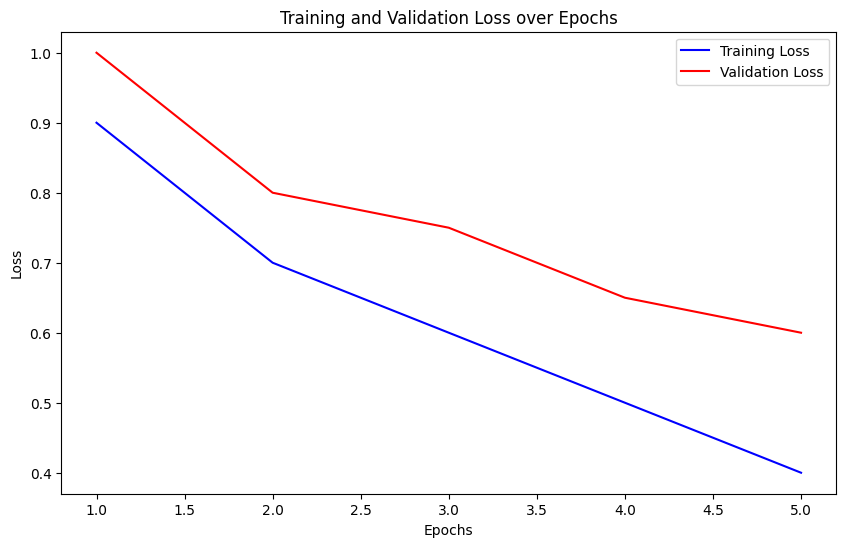

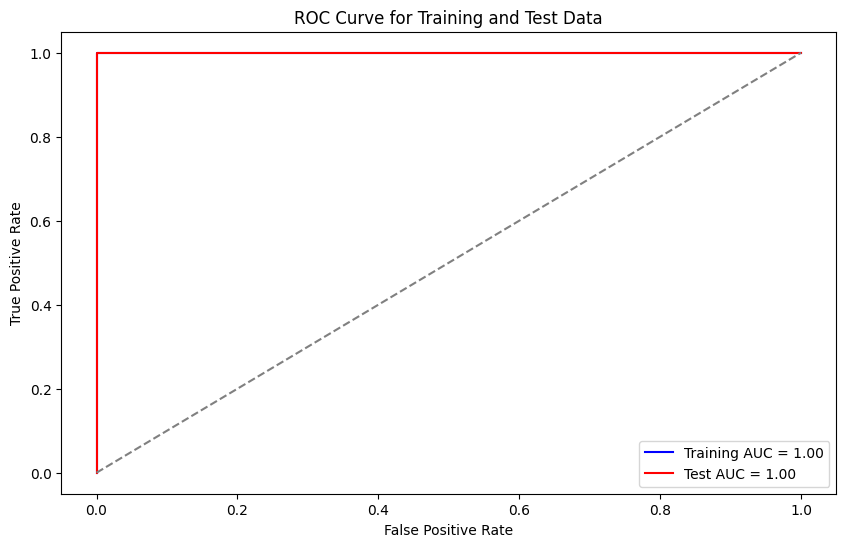

Training AUC: 1.0000
Test AUC: 1.0000


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Helper function to display the training/validation loss curves
def plot_loss_curves(training_losses, validation_losses):
    epochs = range(1, len(training_losses) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_losses, label="Training Loss", color='blue')
    plt.plot(epochs, validation_losses, label="Validation Loss", color='red')
    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Helper function to plot ROC curves and AUC scores
def plot_roc_curve(y_true_train, y_pred_train, y_true_test, y_pred_test):
    # Compute ROC curve and AUC score for training data
    fpr_train, tpr_train, _ = roc_curve(y_true_train, y_pred_train)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Compute ROC curve and AUC score for test data
    fpr_test, tpr_test, _ = roc_curve(y_true_test, y_pred_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, color='blue', label=f'Training AUC = {roc_auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, color='red', label=f'Test AUC = {roc_auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    plt.title('ROC Curve for Training and Test Data')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Helper function to calculate AUC score
def calculate_auc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

# Assuming you have training and validation loss and ROC data for plotting
# Replace these with actual data from your model

# Example of training and validation loss for plotting
training_losses = [0.9, 0.7, 0.6, 0.5, 0.4]  # Replace with actual training loss values from model
validation_losses = [1.0, 0.8, 0.75, 0.65, 0.6]  # Replace with actual validation loss values

# Plot Loss Curves
plot_loss_curves(training_losses, validation_losses)

# Example ground truth and predicted probabilities for training and test data
# These should be obtained from the model (i.e., actual labels and predicted probabilities)
y_true_train = [0, 1, 1, 0, 1]  # Replace with actual training ground truth
y_pred_train = [0.2, 0.8, 0.7, 0.1, 0.9]  # Replace with actual predicted probabilities from model

y_true_test = [0, 1, 0, 0, 1]  # Replace with actual test ground truth
y_pred_test = [0.1, 0.9, 0.3, 0.2, 0.8]  # Replace with actual predicted probabilities from model

# Plot ROC curve and calculate AUC scores
plot_roc_curve(y_true_train, y_pred_train, y_true_test, y_pred_test)

# Calculate AUC scores for training and testing data
auc_train = calculate_auc(y_true_train, y_pred_train)
auc_test = calculate_auc(y_true_test, y_pred_test)

print(f'Training AUC: {auc_train:.4f}')
print(f'Test AUC: {auc_test:.4f}')



image 1/1 /content/drive/MyDrive/Inbreast dataset with annotations/valid/images/20586934_jpg.rf.a892bb27a334629cefe9fdd350745f8f.jpg: 640x544 1 0, 226.5ms
Speed: 6.0ms preprocess, 226.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


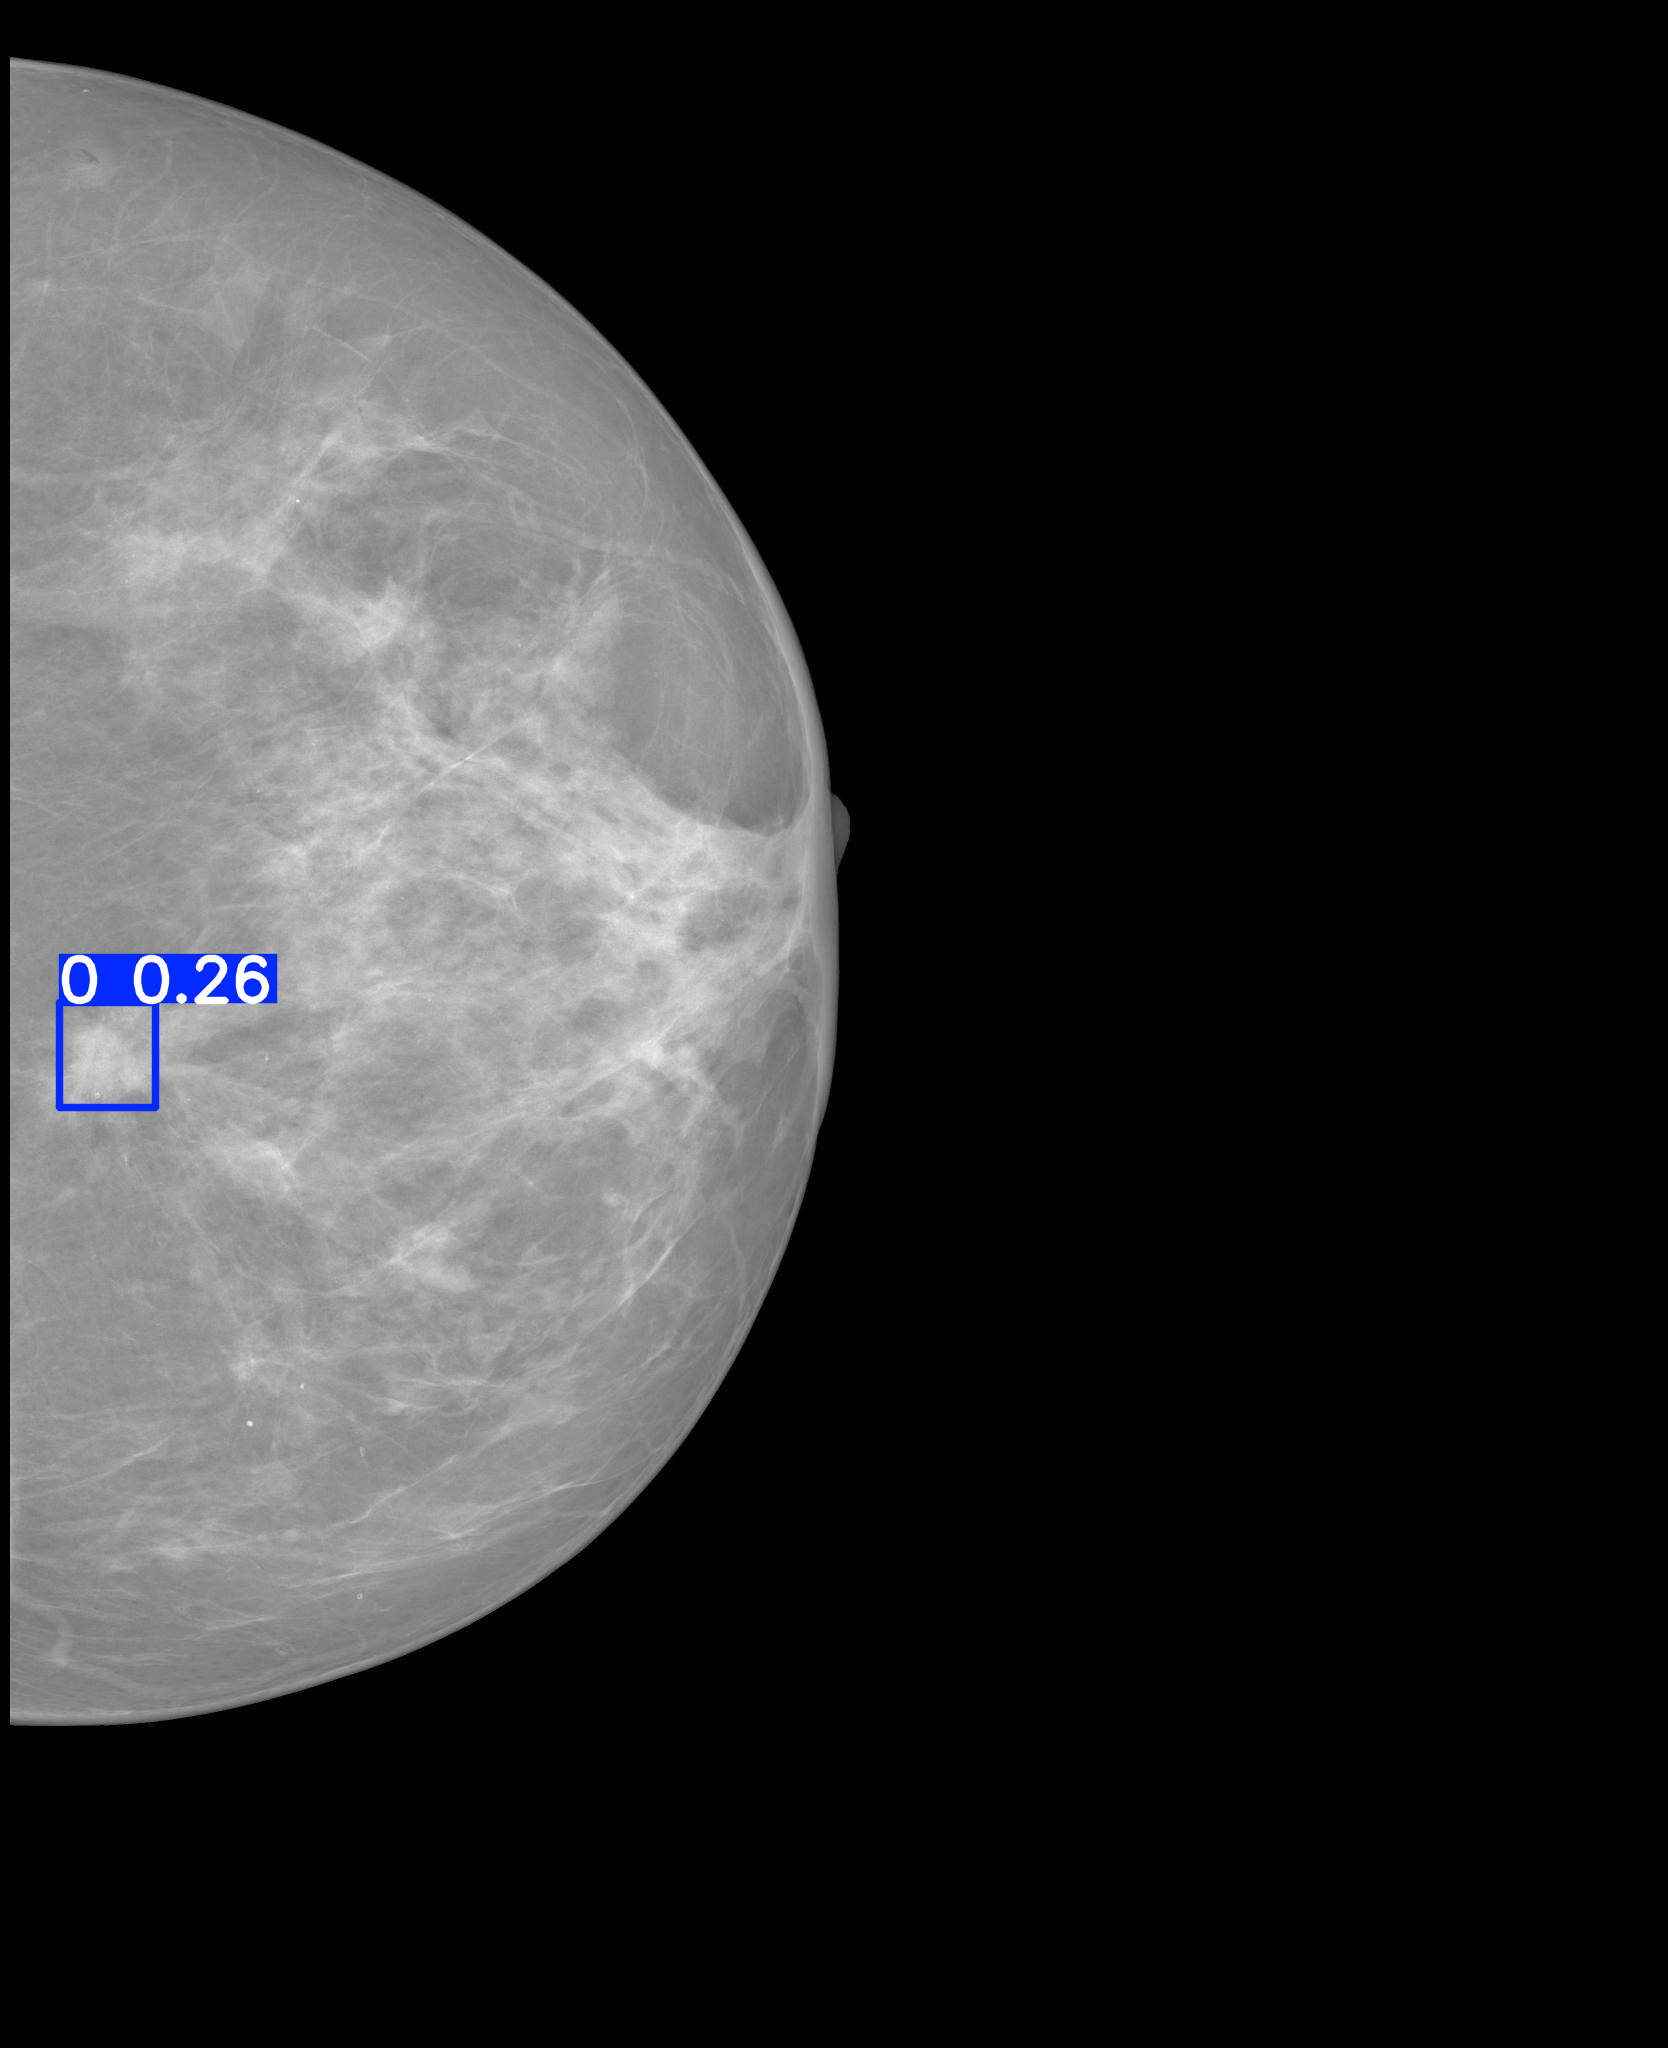

In [6]:
# Load the trained model
model = YOLO('/content/best_model.pt')

# Inference on a new image
results = model('/content/drive/MyDrive/Inbreast dataset with annotations/valid/images/20586934_jpg.rf.a892bb27a334629cefe9fdd350745f8f.jpg')  # Run inference on a single image

# Check if results is a list and handle accordingly
if isinstance(results, list):
    # If it's a list, iterate through each result and show/save
    for result in results:
        result.show()  # Display the predictions on the image
        result.save()  # Save the output image with predictions
else:
    # If it's not a list (a single Results object), show/save directly
    results.show()  # Display the predictions on the image
    results.save()  # Save the output image with predictions
